**Константин, привет!**

Меня зовут Артемьева Саша, я буду проверять твой проект. Приятно познакомиться, хоть и заочно:)
    
Предлагаю общаться на «ты» :) Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Так выделены небольшие замечания. Одно-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 


# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Молодец, что задал шапку профиля! Еще в ней стоит написать шаги исследования и цели, которые мы должны достигнуть в финале работы


### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/datasets/real_estate_data.csv',  sep='\t')

display(data.columns)

display(data.head(20))


Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>
Если добавить скобки в конце, информация будет выведена в более аккуратном виде

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

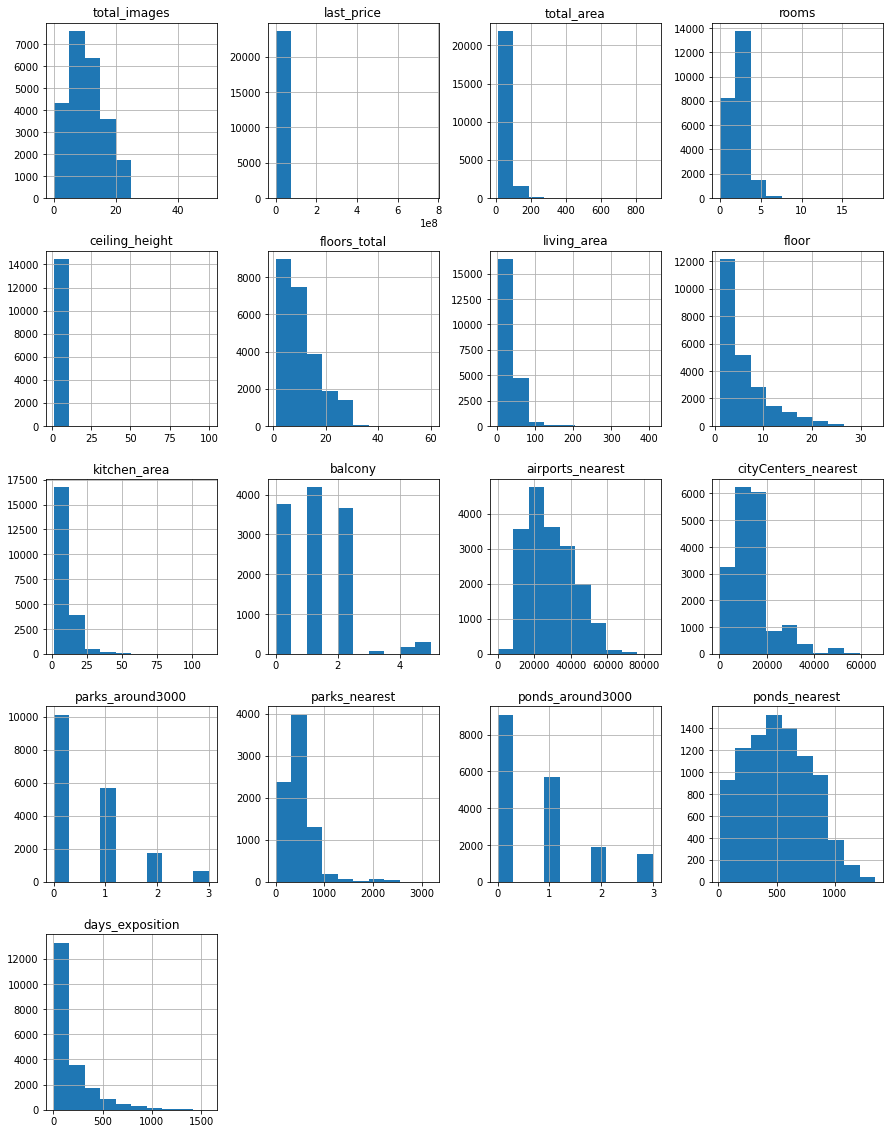

In [3]:
data.hist(figsize=(15, 20))

Данные успешно прочитанны.

<div class="alert alert-danger">
<b>❌
 Комментарий ревьюера:</b> Каждый раздел важно завершать небольшим выводом. Что мы увидели по итогам обзора данных?


В данных присутствуют аномальные значения и выбросы, а некоторые переменные представлены в неправильном типе данных, что необходимо исправить.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b>
Принято

### Предобработка данных

In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> В этой иснформации трудно разобраться. Лучше вывести информацию методом .describe(), так мы увидим минимальные и максимальные значения, среднее и медиану, квартили. То есть будем знать, если ли у нас выбросы

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d') #Исправлен тип данных на DateTime
data['balcony'] = data['balcony'].fillna(0).astype('int')
data['is_apartment'] = data['is_apartment'].fillna(False)
data['last_price']= data['last_price'].astype('int')

<div class="alert alert-danger">
<b>❌
 Комментарий ревьюера:</b> Мы можем заполнять данные нулями только когда данные пропущены совершенно случайно (MCAR https://robotdreams.cc/blog/103-chto-takoe-propuski-dannyh-i-kak-s-nimi-rabotat, https://publications.hse.ru/mirror/pubs/share/folder/21tn35z9vl/direct/92272011) - тогда заполнение не повлияет на характер связи между заполняемой переменной и остальными. Можно проанализировать распределение пропусков в данном столбце во времени относительно дня выставления квартиры на продажу, чтобы понять, являются ли пропуски случайными и можем ли мы их заполнить нулями.


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера V2:</b> Обработка пропусков в длительности продажи, опять же, неточная. Заполнять мы, строго говоря, имеем право только когда данные пропущены совершенно случайно. Если посмотреть на распределение пропусков во времени, увидим закономерность. Поэтому лучше оставить пропуски как есть. Отсуствие значений - тоже важный маркер, который не стоит прятать

In [6]:
#Замена аномальных значений (выбросов) медианой

data['ceiling_height'].where(~(data.ceiling_height > 6), other=(data['ceiling_height'].median()), inplace=True)
data['ceiling_height'].where(~(data.ceiling_height < 2.5), other=(data['ceiling_height'].median()), inplace=True)
data['total_area'].where(~(data.total_area > 116), other=(data['total_area'].median()), inplace=True)
data['rooms'].where(~(data.rooms > 6), other=(data['rooms'].median()), inplace=True)
data['days_exposition'].where(~(data.days_exposition > 461), other=(data['days_exposition'].median()), inplace=True)
data['living_area'].where(~(data.living_area > 50), other=(data['living_area'].median()), inplace=True)
data['kitchen_area'].where(~(data.kitchen_area > 15), other=(data['kitchen_area'].median()), inplace=True)
data['last_price'].where(~(data.last_price > data.last_price.quantile(0.95)), other=(data['last_price'].median()), inplace=True) 

<div class="alert alert-info"> Заменил аномальные значения медианой - не по хардкору :) . Надеюсь я правильно отсек выбросы в последнем случае. </div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>  По САНПИН высота потолка в жилом помещении не должна быть ниже 2.5 м. Я бы советовала брать эту отметку в качестве нижней границы


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>  Старайся везде избегать хардкода (заполнения руками). Если данные изменятся, наш код отработает некорректно. Заполнить мендианой можно так:
    
    df[''].fillna(df[''].median())


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b>
Теперь все отлично!

In [7]:
#Замена неявных дубликатов в названиях населенных пунктов
data['locality_name'].replace(to_replace=['посёлок ', 'городской ', 'деревня ', 'село ', 'поселок ', 'типа ', 'городского ', 'станции ', 'садовое ', 'коттеджный ', 'товарищество ', 'при железнодорожной ', 'садоводческое ', 'некоммерческое ', 'имени ', 'Пансионат '], value="", inplace = True, regex=True)
data['locality_name'].replace(to_replace=['ё'], value="е", inplace = True, regex=True)
#Проверка:
display(data['locality_name'].unique())

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>
Молодец, что поработал с локациями! Так избавились от части неявных дублей

Исправлены типы данных. Замененны отсутствующие значения, где необходимо. Произведена замена аномальных значений медианой. устранены неявные дубликаты в названиях населённых пунктов.

### Посчитайте и добавьте в таблицу новые столбцы

In [8]:
data['price_per_sqm'] = round(data['last_price'] / data['total_area'], 1) # цена одного квадратного метра;
data['weekday'] = data['first_day_exposition'].dt.weekday # день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
data['month'] = data['first_day_exposition'].dt.month # месяц публикации объявления;
data['year'] = data['first_day_exposition'].dt.year # год публикации объявления;

def floor_category(row): # тип этажа квартиры
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой' 
data['floor_category'] = data.apply(floor_category, axis = 1)

data['cityCenters_nearest_in_km'] = (data['cityCenters_nearest'] / 1000).round(0) # расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

display(data.head(20))
display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,floor_category,cityCenters_nearest_in_km
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,30.00,8,False,...,482.0,2.0,755.0,NaN,120370.4,3,3,2019,другой,16.0
1,7,3350000,40.40,2018-12-04,1,NaN,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.8,1,12,2018,первый,19.0
2,10,5196000,56.00,2015-08-20,2,NaN,5.0,34.30,4,False,...,90.0,2.0,574.0,95.0,92785.7,3,8,2015,другой,14.0
3,0,4650000,52.00,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,89423.1,4,7,2015,другой,7.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,112.0,1.0,48.0,121.0,100000.0,1,6,2018,другой,8.0
5,10,2890000,30.40,2018-09-10,1,NaN,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.8,0,9,2018,другой,NaN
6,6,3700000,37.30,2017-11-02,1,NaN,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.7,3,11,2017,другой,19.0
7,5,7915000,71.60,2019-04-18,2,NaN,24.0,NaN,22,False,...,NaN,0.0,NaN,NaN,110544.7,3,4,2019,другой,12.0
8,20,2900000,33.16,2018-05-23,1,NaN,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.8,2,5,2018,другой,NaN
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.6,6,2,2017,другой,15.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_sqm,weekday,month,year,cityCenters_nearest_in_km
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,23699.000000,...,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,23699.000000,23699.000000,23699.000000,23699.000000,18180.000000
mean,9.858475,5.145345e+06,54.401811,2.047724,2.728066,10.673824,28.554662,5.892358,9.048316,0.591080,...,0.611408,490.804555,0.770255,517.980900,118.927966,95068.034951,2.569307,6.400101,2017.367146,14.184818
std,5.682529,2.665906e+06,19.127283,1.004863,0.277019,6.597173,9.748982,4.885249,2.431583,0.959298,...,0.802074,342.317995,0.938346,277.720643,106.177082,35722.410264,1.789082,3.491561,1.039771,8.616194
min,0.000000,1.219000e+04,12.000000,0.000000,2.500000,1.000000,2.000000,1.000000,1.300000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,111.800000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,294.000000,45.000000,75491.400000,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,...,0.000000,455.000000,1.000000,502.000000,95.000000,92470.300000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.190000e+06,64.870000,3.000000,2.800000,16.000000,34.110000,8.000000,10.500000,1.000000,...,1.000000,612.000000,1.000000,729.000000,161.000000,111111.100000,4.000000,10.000000,2018.000000,16.000000
max,50.000000,1.530000e+07,116.000000,6.000000,6.000000,60.000000,50.000000,33.000000,15.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,461.000000,600000.000000,6.000000,12.000000,2019.000000,66.000000


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Обычно в датафреймах содержатся данные за несколько лет. Важно выбрать корректный метод для вычленения месяца, иначе месяца разных годов могут стать одним месяцем (метод month может привести к ошибке). Обрати внимание на метод astype('datetime64[M]'). Для его использования не нужно обращаться к pd.DatetimeIndex. В данной работе нам не нужно разделять месяца разных годов. Это практичный совет на будущее:) 


Посчитаны и добавлены новые столбцы в datafame.

### Проведите исследовательский анализ данных

In [9]:
analysis = ['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms', 'ceiling_height', 'floor', 'floor_category', 'floors_total', 'cityCenters_nearest', 'airports_nearest', 'parks_nearest', 'weekday', 'month']
analysis_title = ['общая площадь','жилая площадь','площадь кухни','цена объекта', 'количество комнат','высота потолков','этаж квартиры','тип этажа квартиры («первый», «последний», «другой»)','общее количество этажей в доме','расстояние до центра города в метрах','расстояние до ближайшего аэропорта','расстояние до ближайшего парка','день и месяц публикации объявления']

display(data[analysis].info())
display(data[analysis].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   total_area           23699 non-null  float64
 1   living_area          21796 non-null  float64
 2   kitchen_area         21421 non-null  float64
 3   last_price           23699 non-null  int64  
 4   rooms                23699 non-null  int64  
 5   ceiling_height       14504 non-null  float64
 6   floor                23699 non-null  int64  
 7   floor_category       23616 non-null  object 
 8   floors_total         23613 non-null  float64
 9   cityCenters_nearest  18180 non-null  float64
 10  airports_nearest     18157 non-null  float64
 11  parks_nearest        8079 non-null   float64
 12  weekday              23699 non-null  int64  
 13  month                23699 non-null  int64  
dtypes: float64(8), int64(5), object(1)
memory usage: 2.5+ MB


None

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total,cityCenters_nearest,airports_nearest,parks_nearest,weekday,month
count,23699.000000,21796.000000,21421.000000,2.369900e+04,23699.000000,14504.000000,23699.000000,23613.000000,18180.000000,18157.000000,8079.000000,23699.000000,23699.000000
mean,54.401811,28.554662,9.048316,5.145345e+06,2.047724,2.728066,5.892358,10.673824,14191.277833,28793.672193,490.804555,2.569307,6.400101
std,19.127283,9.748982,2.431583,2.665906e+06,1.004863,0.277019,4.885249,6.597173,8608.386210,12630.880622,342.317995,1.789082,3.491561
min,12.000000,2.000000,1.300000,1.219000e+04,0.000000,2.500000,1.000000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000
25%,40.000000,18.600000,7.000000,3.400000e+06,1.000000,2.520000,2.000000,5.000000,9238.000000,18585.000000,288.000000,1.000000,3.000000
50%,52.000000,30.000000,9.100000,4.650000e+06,2.000000,2.650000,4.000000,9.000000,13098.500000,26726.000000,455.000000,3.000000,6.000000
75%,64.870000,34.110000,10.500000,6.190000e+06,3.000000,2.800000,8.000000,16.000000,16293.000000,37273.000000,612.000000,4.000000,10.000000
max,116.000000,50.000000,15.000000,1.530000e+07,6.000000,6.000000,33.000000,60.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>
Можно сделать по аналогии с тем, как ты делал в начале работы:

array([[<AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'last_price'}>],
       [<AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'floors_total'}>],
       [<AxesSubplot:title={'center':'cityCenters_nearest'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'weekday'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

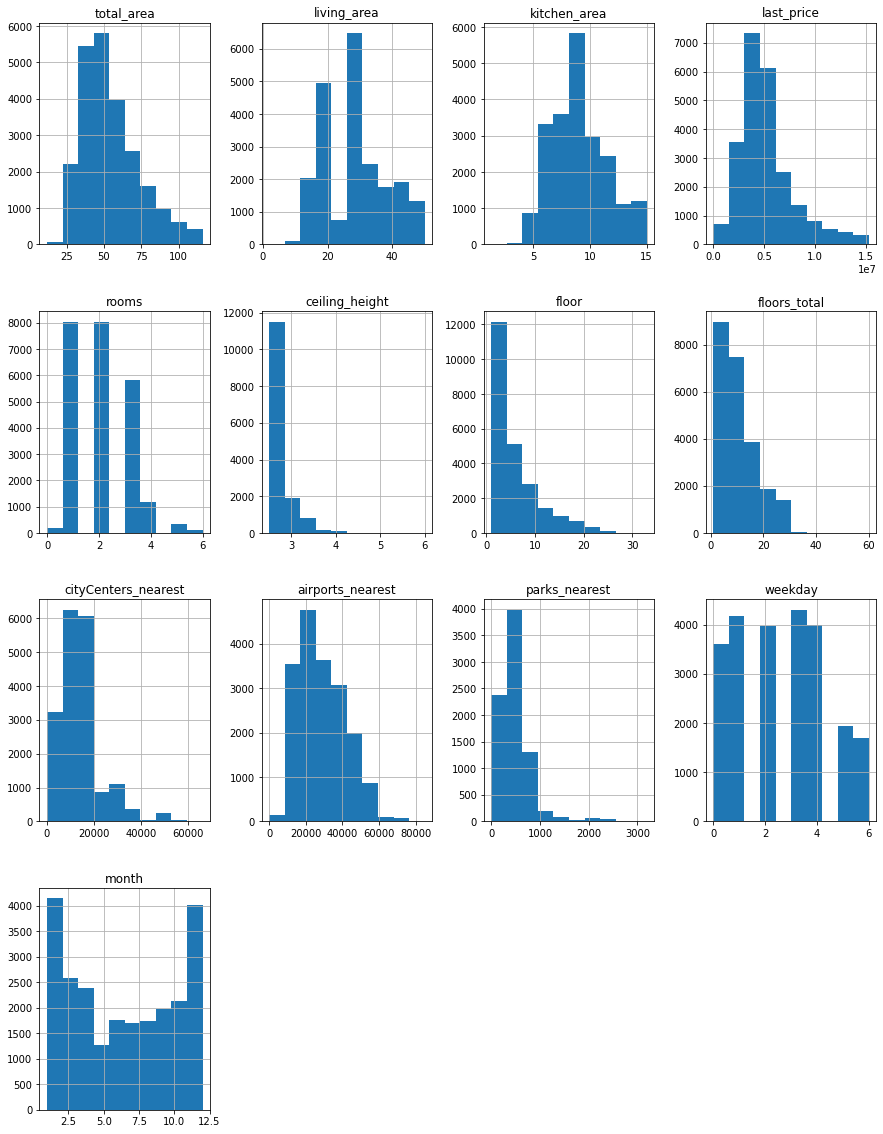

In [10]:
data[analysis].hist(figsize=(15, 20))

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>
Показала, как построить гистограмы выше. Давай теперь опишем увиденное

На гистограммах видно, что в результате обработки аномальных значений, в данных отсутствуют выбросы.

Перейдем к заданиям:

Задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.

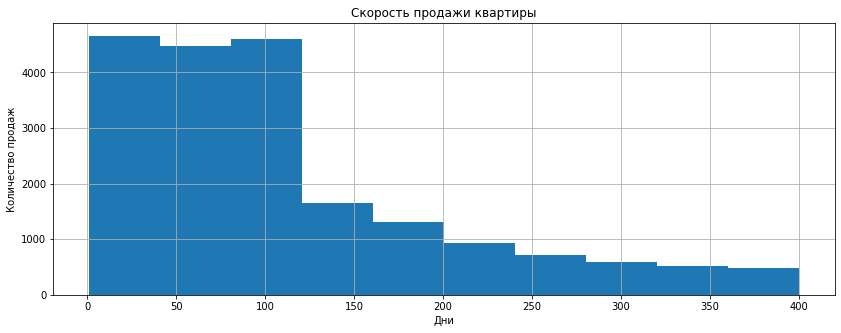

118.92796568866362

95.0

In [11]:
data.plot(y='days_exposition', kind='hist', figsize=(14, 5), title='Скорость продажи квартиры', grid=True, legend=False, range=(1,400)) #Постройте гистограмму.
plt.xlabel('Дни')
plt.ylabel('Количество продаж')
plt.show()

display(data['days_exposition'].mean()) #Посчитайте среднее.
display(data['days_exposition'].median()) #Посчитайте медиану.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Вы еще не проходили подписи графиков (осей), но можно их добавить, чтобы гистограмма стала информативнее. Можно почитать здесь, как добавить подписи: 
    
    https://www.geeksforgeeks.org/adding-labels-to-histogram-bars-in-matplotlib/


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b>
Молодец, что разобрался!

В среднем продажа занимает 156 дней, однако медианным значением считается 74 дня. 
Все продажи сделанные менее чем за 100 дней можно считать быстрыми, однако стоит учитывать дополнительные данные.
Все продажи, которые требуют больше 250-300 дней можно считать долгими.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера:</b>
Перед тем, как переходить к анализу зависимостей, важно убедиться, что в рассмотренных выше данных нет выбросов. Давай сделаем это

Задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."


общей площади;
жилой площади;
площади кухни;
количество комнат;
типа этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год);

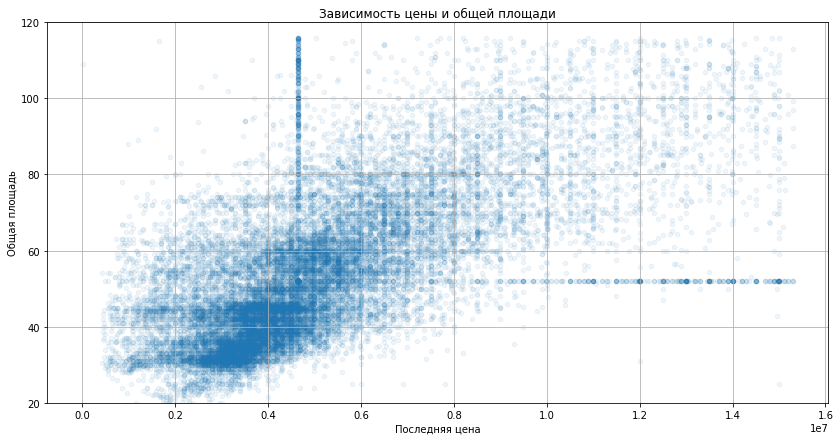

0.643220031492489

In [12]:
data.plot(x='last_price', y='total_area', kind='scatter', title='Зависимость цены и общей площади', figsize=(14, 7), grid=True, alpha=0.07, ylim=(20, 120))
plt.xlabel('Последняя цена')
plt.ylabel('Общая площадь')
plt.show()

data['last_price'].corr(data['total_area'])

Между Ценой и общей площадью обнаружена средняя положительная корреляция. Значит цена зависит от общей площади.

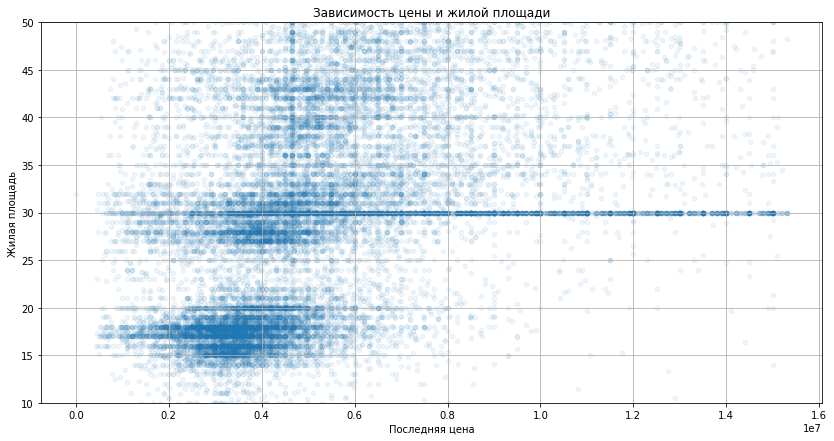

0.3815357718828692

In [13]:
data.plot(x='last_price', y='living_area', kind='scatter', title='Зависимость цены и жилой площади', figsize=(14, 7), grid=True, alpha=0.07, ylim=(10, 50))
plt.xlabel('Последняя цена')
plt.ylabel('Жилая площадь')
plt.show()

data['last_price'].corr(data['living_area'])

Между ценой и площадью жилой зоны обнаружена средняя положительная корреляция. Значит цена растет в зависимости от площади жилой области.

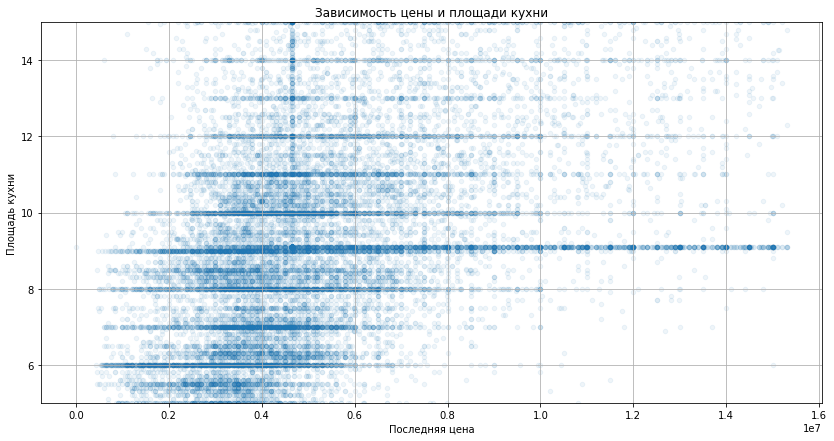

0.3964084390402332

In [14]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', title='Зависимость цены и площади кухни', figsize=(14, 7), grid=True, alpha=0.07, ylim=(5, 15))
plt.xlabel('Последняя цена')
plt.ylabel('Площадь кухни')
plt.show()

data['last_price'].corr(data['kitchen_area'])

Между ценой и площадью кухни обнаружена средняя положительная корреляция. Значит цена растет в зависимости от площади кухни.

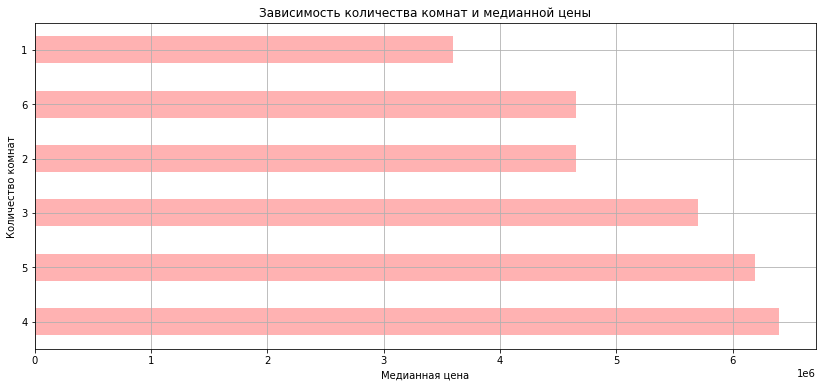

In [15]:
data.query('rooms != 0').pivot_table(index = 'rooms', values = 'last_price', aggfunc= 'median').sort_values(by='last_price', ascending=False).plot(y='last_price', kind='barh', color='red', title='Зависимость количества комнат и медианной цены', figsize=(14, 6), legend=False, alpha=0.3, grid=True)
plt.xlabel('Медианная цена')
plt.ylabel('Количество комнат')
plt.show()

Цена на квартиру растет в зависимости от количества комнат. Наибольшая средняя цена за трехкомнатную квартиру.

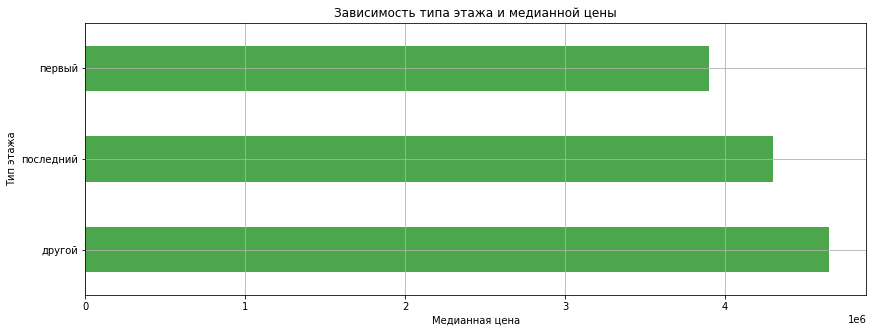

In [16]:
data.pivot_table(index = 'floor_category', values = 'last_price', aggfunc= 'median').sort_values(by='last_price', ascending=False).plot(y='last_price', kind='barh', title='Зависимость типа этажа и медианной цены', figsize=(14, 5), color='green', legend=False, alpha=0.7, grid=True)
plt.xlabel('Медианная цена')
plt.ylabel('Тип этажа')
plt.show()

Первые этажи и последние этаже медианно стоят дешевле, чем все остальные.  

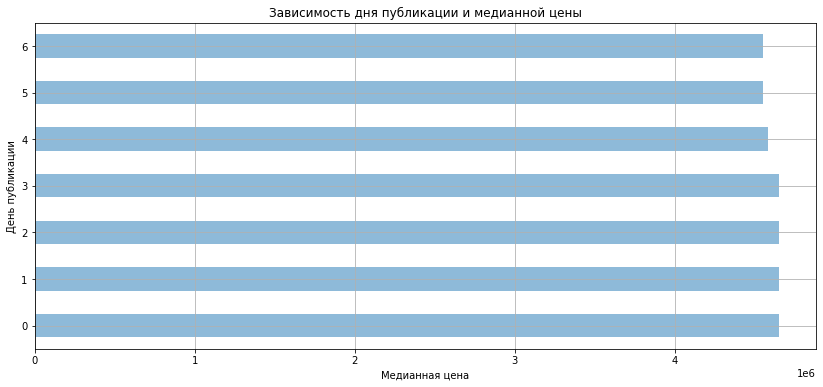

In [17]:
data.pivot_table(index = 'weekday', values = 'last_price', aggfunc= 'median').sort_values(by='last_price', ascending=False).plot(y='last_price', kind='barh', title='Зависимость дня публикации и медианной цены', figsize=(14, 6), legend=False, alpha=0.5, grid=True)
plt.xlabel('Медианная цена')
plt.ylabel('День публикации')
plt.show()  

Дороже всего квартиры продавались во вторник и среду, а хуже всего в выходные дни: субботу и воскресение.

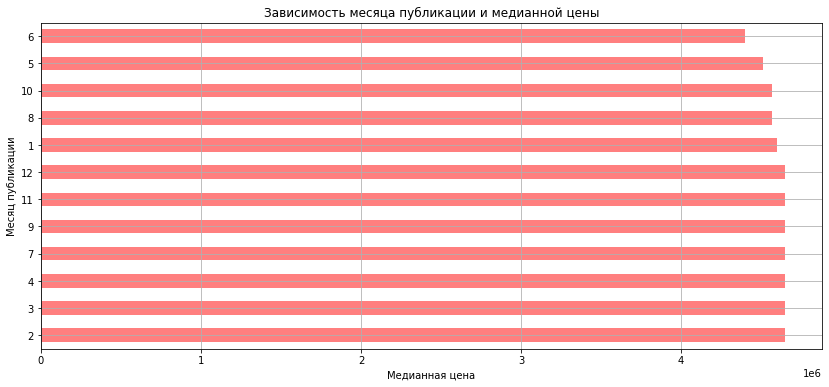

In [18]:
data.pivot_table(index = 'month', values = 'last_price', aggfunc= 'median').sort_values(by='last_price', ascending=False).plot(y='last_price', kind='barh', title='Зависимость месяца публикации и медианной цены', color='red', figsize=(14, 6), legend=False, alpha=0.5, grid=True)
plt.xlabel('Медианная цена')
plt.ylabel('Месяц публикации')
plt.show()

Дороже всего квартиры продавались в феврале, марте, апреле, а дешевле всего в дачный сезон (июнь и май). 

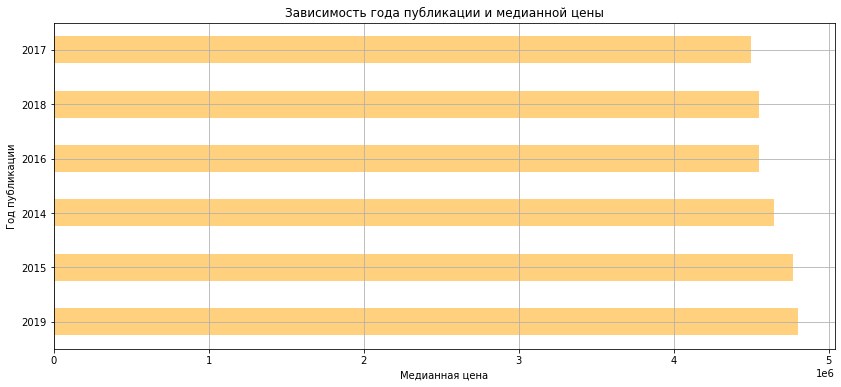

In [19]:
data.pivot_table(index = 'year', values = 'last_price', aggfunc= 'median').sort_values(by='last_price', ascending=False).plot(y='last_price', kind='barh', title='Зависимость года публикации и медианной цены', color='orange', figsize=(14, 6), legend=False, alpha=0.5, grid=True)
plt.xlabel('Медианная цена')
plt.ylabel('Год публикации')
plt.show()

Дороже всего квартиры продавались в 2014 году, а дешевле в 2017.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b> Ты прав. Зависимость лучше всего показывает корреляция Пирсона. На параметрах 'last_price', 'total_area', 'rooms', 'cityCenters_nearest' коэффициент корреляции Пирсона работает хорошо. Но применение его к остальным параметрам - типу этажа, дню недели, году, и месяцу - не эффективно, т.к. цена квартиры зависит от них не линейно. Остальные параметры можно рассмотреть на обычных диаграммах, к примеру, столбчатых или линейных, сгруппировав данные по нужным параметрам и рассмотрев среднее цены.
    
    
    
Давай еще немного поработаем с корреляцией. Более наглядно можно было бы сделать следующим образом:
    
1) построить корреляцию матрицей для нужных параметров
 
df[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
    
2) интерпретировать получившийся коэффициент
    
3) для визуализации параметров использовать простой и полезный метод sns.pairplot - он отобразит корреляцию всех графиков компактным "полотном"
    
4) для остальных параметров оставить обычные графики
    
</div>





In [20]:
corr = data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.00,0.64,0.43,-0.32
total_area,0.64,1.00,0.68,-0.17
rooms,0.43,0.68,1.00,-0.17
cityCenters_nearest,-0.32,-0.17,-0.17,1.00


Цена имеет положительную корреляцию с количеством комнат и общей площадью и отрицательную с удаленностью от центра города.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b>
Верно. Наблюдаем сильную положительную корреляцию с количеством комнат и общей площадью и слабую отрицательную с удаленностью от центра города

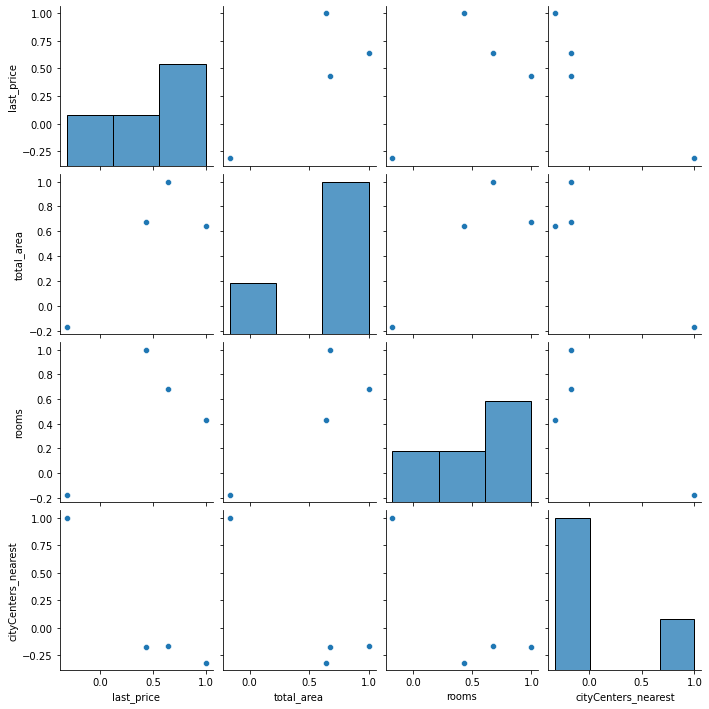

In [22]:
sns.pairplot(corr)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Ты правильно воспользовался методом, но передал в него несуществующую матрицу)Замени ее на корректную и все отрисуется

Задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name."

In [ ]:
locality = data.query('locality_name != "Санкт-Петербург"').pivot_table(index = 'locality_name', values = 'price_per_sqm', aggfunc=['count', 'mean'])
locality.columns = ['count', 'mean']
locality = locality.sort_values('count', ascending = False).head(10)
display(locality)

In [ ]:
#самая высокая стоимость
display(locality[locality['mean']==locality['mean'].max()])

Наибольшая стоимость квадратного метра в Пушкине. 

In [ ]:
#самая низкая стоимость
display(locality[locality['mean']==locality['mean'].min()])

Наименьшая стоимость квадратного метра в Выборге.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b>
Отлично!

Задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."

In [ ]:
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].fillna(99999)
data['cityCenters_nearest_in_km'] = data['cityCenters_nearest_in_km'].astype('int')
data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_in_km !=99999').pivot_table(index = 'cityCenters_nearest_in_km', values = 'price_per_sqm', aggfunc = 'median').plot(title='Cредняя цена каждого километра', legend=False)
plt.xlabel('Расстояние от центра города в километрах')
plt.ylabel('Медианная цена')
plt.show()

for_corr = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_in_km !=99999')
for_corr['price_per_sqm'].corr(for_corr['cityCenters_nearest_in_km'])

Чем ближе к центру Санкт-Петербурга, тем выше медианная стоимость квартиры, однако корреляция выявила только слабую отрицательную связь между этими показателями.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Наблюдаем также некоторые скачки в районе 5-6, 20 и 27-28 км. Это может быть связано с новыми элитными районами (экология, транспортная доступность, развитая инфраструктура)


### Общий вывод

В результате работы был проанализирован полученный архив данных, в первую очередь обработаны пропущенные значения там, где это было необходимо, замененны типы данных для удобной работы. Посчитаны и добавлены в таблицу цену квадратного метра жилья, выведены из даты дни недели, месяцы и года размещения объявлений, добавлены категории по этажам квартир. Исправлены дубликаты данных в названиях населенных пунктов. Изучены следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков и исправлены аномалии.

Было выявлено, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.
Медианная стоимость квартиры в центре Санкт-Петербурга напрямую зависит от количества комнат: Чем больше комнат - Тем выше медианное значение стоимости квартиры. Максимальная стоимость у 2, 3 и 4 комнатных квартир. Это наблюдение аналогично наблюдениям по остальным городам и районам.

Между параметрами "количество комнат" и "средняя стоимость" квартиры есть прямая зависимость: чем больше комнат в квартире, тем выше её средняя стоимость, данное наблюдение характерно как для центральной части Санкт-Петербурга, так и для остальных районов и населённых пунктов.

Самая высокая средняя стоимость у квартир, которые расположены выше первого и ниже последнего этажа. Самые дешевые квартиры находятся на первом этаже, разница в средней стоимости между первым и другим этажом (не последним) составляет более 1 млн. рублей, при этом ситуация для всех населённых пунктов немного другая, здесь эта разница составляет менее 1 млн. рублей. Средняя цена квартиры напрямую зависит от типа этажа на котором расположена квартира как в центре Санкт-Петербурга, так и во всех населённых пунктах.

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера:</b>  У тебя получился отличный вывод! Мне нравится, что вначале ты кратко описал проделанную с данными работу. Можно обогатить вывод, установив примерную рыночную стоимость для объектов,  исходя из влияния параметров 


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Корректно

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера:</b> Спасибо за проект! Видно, что ты старался и он получился достойным. Ты аккуратно работаешь с данными и выносишь качественные предположения - как настоящий аналитик. Однако есть моменты, которые стоит доработать:
    
- не всегда корректно заполнять пропуски нулями
- перед тем, как переходить к анализу, важно проверить, не осталось ли в данных выбросов
- можно расширить корреляционный анализ, добавиви корреляционную матрицу для нужных параметров
- расширить финальный вывод
    
Возвращаю тебе работу, чтобы ты смог задать вопросы. Буду ждать твою работу на повторное ревью!
</div>


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера V2:</b> Спасибо за проработку комментариев! Теперь все отлично. Если у тебя возникнут вопросы, смело задавай мне их через куратора. Удачи на следующих этапах!
